In [1]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
p_nw = []
p_net_nw = []
loss_nw = []
loss_net_nw = []
bool_nw = []

for network_name in ["Random_ER", "Random_SF", "ChIP_hTFtarget", "ChIP_TIP", "ChIP_TIP_K562", "CoExpr_perturb_0.5", "CoExpr_GTEx_WholeBlood_0.75", "CoExpr_ENCODE_K562_0.75", "BIOGRID", "STRING", "Combine", "NOTEARS_thresholdAdaptive", "DAGMA_thresholdAdaptive"]:
    
    # measurements across 10 random sample split
    p_rs = []
    p_net_rs = []
    loss_rs = []
    loss_net_rs = []
    bool_rs = []
    
    for rs in range(10):
        # read data
        X_train = pd.read_csv("../../result/input_perturb_phyloP/%d/X_train_stratified" % rs, sep="\t", index_col=0).values
        X_valid = pd.read_csv("../../result/input_perturb_phyloP/%d/X_valid_stratified" % rs, sep="\t", index_col=0).values
        X_test = pd.read_csv("../../result/input_perturb_phyloP/%d/X_test_stratified" % rs, sep="\t", index_col=0).values
        Y_test = pd.read_csv("../../result/input_perturb_phyloP/%d/Y_test_stratified" % rs, sep="\t", index_col=0).values.reshape(-1)
        Y_test_gene = pd.read_csv("../../result/input_perturb_phyloP/%d/Y_test_stratified" % rs, sep="\t", index_col=0).index

        test_mask = np.concatenate([[False] * len(X_train), [False] * len(X_valid), [True] * len(X_test)])

        # mask of whether a test node is in the DAGMA graph
        dag = pd.read_csv("../../result/network_perturb_phyloP/DAGMA_thresholdAdaptive.tsv", sep="\t", header=None)
        id2genes = pd.read_csv("../../result/network_perturb_phyloP/valid_genes", sep="\t").set_index("ID")['genes'].to_dict()
        dag[0] = dag[0].map(id2genes)
        dag[1] = dag[1].map(id2genes)
        dag_genes = list(set.union(set(dag[0]), set(dag[1])))
        test_inDAG = Y_test_gene.isin(dag_genes)

        # measurements across 10 random init repeats
        p_rep = []
        p_net_rep = []
        loss_rep = []
        loss_net_rep = []

        for rep in range(10):
            prefix = "../../result/model_perturb_phyloP_deep3/%s/%d/model%d" % (network_name, rs, rep)
            with open(prefix+".para", "rb") as f:
                best_params, X1, out, loss1, loss2 = pickle.load(f)
            Y_pred = out[test_mask].reshape(-1)

            loss_rep.append(F.mse_loss(torch.tensor(Y_test), torch.tensor(Y_pred)).item())
            loss_net_rep.append(F.mse_loss(torch.tensor(Y_test[test_inDAG]), torch.tensor(Y_pred[test_inDAG])).item())
            p_rep.append(pearsonr(Y_test, Y_pred)[0])
            p_net_rep.append(pearsonr(Y_test[test_inDAG], Y_pred[test_inDAG])[0])
        bool_rep = ~np.isnan(np.array(p_net_rep))

        p_rs.append(p_rep)
        p_net_rs.append(p_net_rep)
        loss_rs.append(loss_rep)
        loss_net_rs.append(loss_net_rep)
        bool_rs.append(bool_rep)
        
    p_nw.append(p_rs)
    p_net_nw.append(p_net_rs)
    loss_nw.append(loss_rs)
    loss_net_nw.append(loss_net_rs)
    bool_nw.append(bool_rs)

/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [3]:
p_nw_3 = np.array(p_nw)
p_net_nw_3 = np.array(p_net_nw)
loss_nw_3 = np.array(loss_nw)
loss_net_nw_3 = np.array(loss_net_nw)
bool_nw_3 = np.array(bool_nw)

In [4]:
p_nw = []
p_net_nw = []
loss_nw = []
loss_net_nw = []
bool_nw = []

for network_name in ["Random_ER", "Random_SF", "ChIP_hTFtarget", "ChIP_TIP", "ChIP_TIP_K562", "CoExpr_perturb_0.5", "CoExpr_GTEx_WholeBlood_0.75", "CoExpr_ENCODE_K562_0.75", "BIOGRID", "STRING", "Combine", "NOTEARS_thresholdAdaptive", "DAGMA_thresholdAdaptive"]:
    
    # measurements across 10 random sample split
    p_rs = []
    p_net_rs = []
    loss_rs = []
    loss_net_rs = []
    bool_rs = []
    
    for rs in range(10):
        # read data
        X_train = pd.read_csv("../../result/input_perturb_phyloP/%d/X_train_stratified" % rs, sep="\t", index_col=0).values
        X_valid = pd.read_csv("../../result/input_perturb_phyloP/%d/X_valid_stratified" % rs, sep="\t", index_col=0).values
        X_test = pd.read_csv("../../result/input_perturb_phyloP/%d/X_test_stratified" % rs, sep="\t", index_col=0).values
        Y_test = pd.read_csv("../../result/input_perturb_phyloP/%d/Y_test_stratified" % rs, sep="\t", index_col=0).values.reshape(-1)
        Y_test_gene = pd.read_csv("../../result/input_perturb_phyloP/%d/Y_test_stratified" % rs, sep="\t", index_col=0).index

        test_mask = np.concatenate([[False] * len(X_train), [False] * len(X_valid), [True] * len(X_test)])

        # mask of whether a test node is in the DAGMA graph
        dag = pd.read_csv("../../result/network_perturb_phyloP/DAGMA_thresholdAdaptive.tsv", sep="\t", header=None)
        id2genes = pd.read_csv("../../result/network_perturb_phyloP/valid_genes", sep="\t").set_index("ID")['genes'].to_dict()
        dag[0] = dag[0].map(id2genes)
        dag[1] = dag[1].map(id2genes)
        dag_genes = list(set.union(set(dag[0]), set(dag[1])))
        test_inDAG = Y_test_gene.isin(dag_genes)

        # measurements across 10 random init repeats
        p_rep = []
        p_net_rep = []
        loss_rep = []
        loss_net_rep = []

        for rep in range(10):
            prefix = "../../result/model_perturb_phyloP_deep4/%s/%d/model%d" % (network_name, rs, rep)
            with open(prefix+".para", "rb") as f:
                best_params, X1, out, loss1, loss2 = pickle.load(f)
            Y_pred = out[test_mask].reshape(-1)

            loss_rep.append(F.mse_loss(torch.tensor(Y_test), torch.tensor(Y_pred)).item())
            loss_net_rep.append(F.mse_loss(torch.tensor(Y_test[test_inDAG]), torch.tensor(Y_pred[test_inDAG])).item())
            p_rep.append(pearsonr(Y_test, Y_pred)[0])
            p_net_rep.append(pearsonr(Y_test[test_inDAG], Y_pred[test_inDAG])[0])
        bool_rep = ~np.isnan(np.array(p_net_rep))

        p_rs.append(p_rep)
        p_net_rs.append(p_net_rep)
        loss_rs.append(loss_rep)
        loss_net_rs.append(loss_net_rep)
        bool_rs.append(bool_rep)
        
    p_nw.append(p_rs)
    p_net_nw.append(p_net_rs)
    loss_nw.append(loss_rs)
    loss_net_nw.append(loss_net_rs)
    bool_nw.append(bool_rs)

/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [5]:
p_nw_4 = np.array(p_nw)
p_net_nw_4 = np.array(p_net_nw)
loss_nw_4 = np.array(loss_nw)
loss_net_nw_4 = np.array(loss_net_nw)
bool_nw_4 = np.array(bool_nw)

In [6]:
p_nw = []
p_net_nw = []
loss_nw = []
loss_net_nw = []
bool_nw = []

for network_name in ["DAGMA_thresholdAdaptive"]:
    
    # measurements across 10 random sample split
    p_rs = []
    p_net_rs = []
    loss_rs = []
    loss_net_rs = []
    bool_rs = []
    
    for rs in range(10):
        # read data
        X_train = pd.read_csv("../../result/input_perturb_phyloP/%d/X_train_stratified" % rs, sep="\t", index_col=0).values
        X_valid = pd.read_csv("../../result/input_perturb_phyloP/%d/X_valid_stratified" % rs, sep="\t", index_col=0).values
        X_test = pd.read_csv("../../result/input_perturb_phyloP/%d/X_test_stratified" % rs, sep="\t", index_col=0).values
        Y_test = pd.read_csv("../../result/input_perturb_phyloP/%d/Y_test_stratified" % rs, sep="\t", index_col=0).values.reshape(-1)
        Y_test_gene = pd.read_csv("../../result/input_perturb_phyloP/%d/Y_test_stratified" % rs, sep="\t", index_col=0).index

        test_mask = np.concatenate([[False] * len(X_train), [False] * len(X_valid), [True] * len(X_test)])

        # mask of whether a test node is in the DAGMA graph
        dag = pd.read_csv("../../result/network_perturb_phyloP/DAGMA_thresholdAdaptive.tsv", sep="\t", header=None)
        id2genes = pd.read_csv("../../result/network_perturb_phyloP/valid_genes", sep="\t").set_index("ID")['genes'].to_dict()
        dag[0] = dag[0].map(id2genes)
        dag[1] = dag[1].map(id2genes)
        dag_genes = list(set.union(set(dag[0]), set(dag[1])))
        test_inDAG = Y_test_gene.isin(dag_genes)

        # measurements across 10 random init repeats
        p_rep = []
        p_net_rep = []
        loss_rep = []
        loss_net_rep = []

        for rep in range(10):
            prefix = "../../result/model_perturb_phyloP/%s/%d/model%d" % (network_name, rs, rep)
            with open(prefix+".para", "rb") as f:
                best_params, X1, out, loss1, loss2 = pickle.load(f)
            Y_pred = out[test_mask].reshape(-1)

            loss_rep.append(F.mse_loss(torch.tensor(Y_test), torch.tensor(Y_pred)).item())
            loss_net_rep.append(F.mse_loss(torch.tensor(Y_test[test_inDAG]), torch.tensor(Y_pred[test_inDAG])).item())
            p_rep.append(pearsonr(Y_test, Y_pred)[0])
            p_net_rep.append(pearsonr(Y_test[test_inDAG], Y_pred[test_inDAG])[0])
        bool_rep = ~np.isnan(np.array(p_net_rep))

        p_rs.append(p_rep)
        p_net_rs.append(p_net_rep)
        loss_rs.append(loss_rep)
        loss_net_rs.append(loss_net_rep)
        bool_rs.append(bool_rep)
        
    p_nw.append(p_rs)
    p_net_nw.append(p_net_rs)
    loss_nw.append(loss_rs)
    loss_net_nw.append(loss_net_rs)
    bool_nw.append(bool_rs)

/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [7]:
p_nw_2 = np.array(p_nw)
p_net_nw_2 = np.array(p_net_nw)
loss_nw_2 = np.array(loss_nw)
loss_net_nw_2 = np.array(loss_net_nw)
bool_nw_2 = np.array(bool_nw)

### all genes

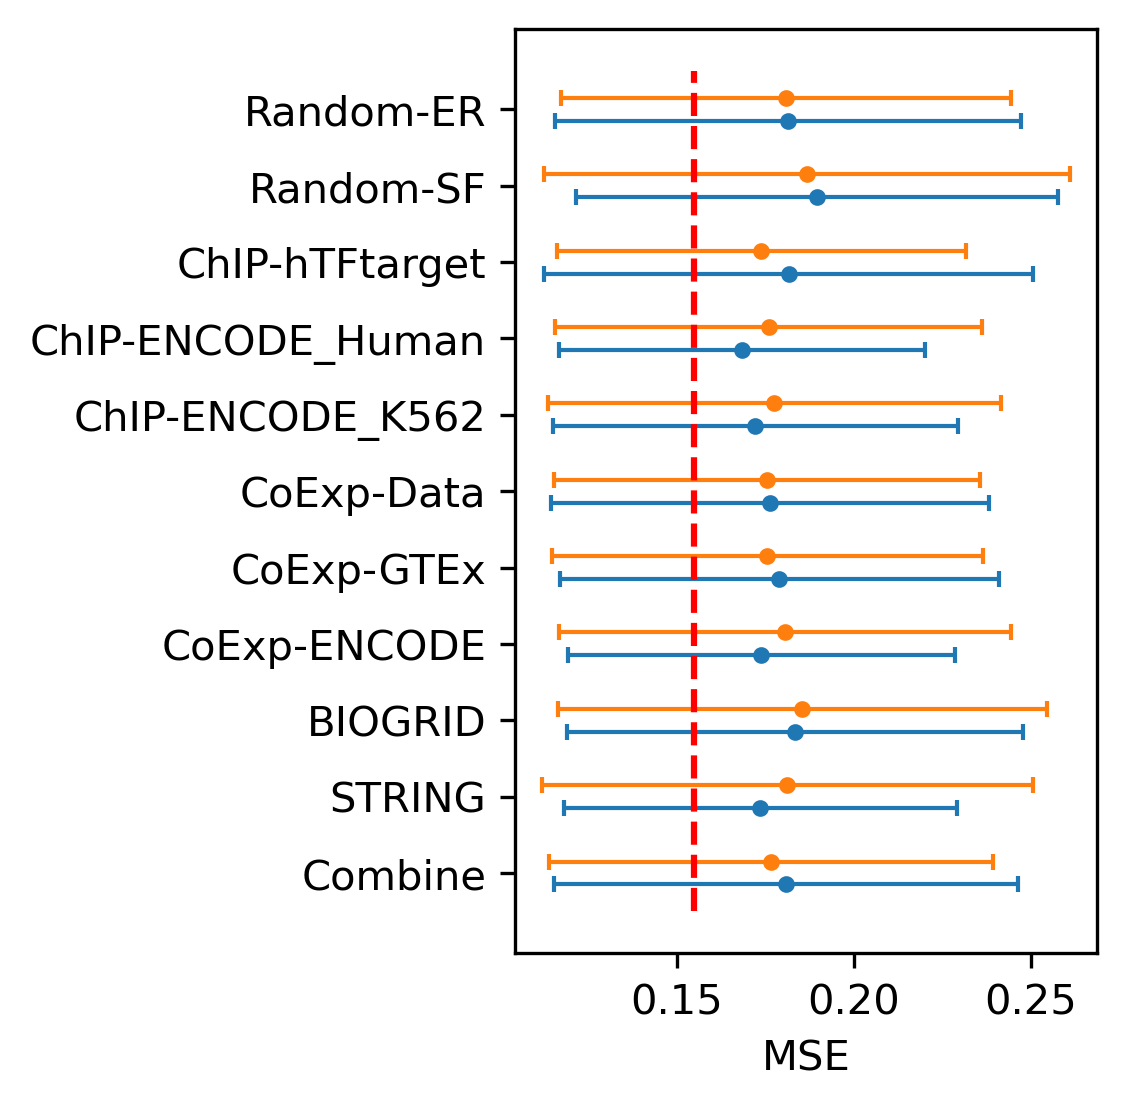

In [8]:
mean_mse_2 = []
std_mse_2 = []
mean_mse_3 = []
std_mse_3 = []
mean_mse_4 = []
std_mse_4 = []

mean_mse_2.append(loss_nw_2[0,:,:].reshape(-1)[bool_nw_2[0,:,:].reshape(-1)].mean())
std_mse_2.append(loss_nw_2[0,:,:].reshape(-1)[bool_nw_2[0,:,:].reshape(-1)].std())  
for ii in range(13):  
    mean_mse_3.append(loss_nw_3[ii,:,:].reshape(-1)[bool_nw_3[ii,:,:].reshape(-1)].mean())
    std_mse_3.append(loss_nw_3[ii,:,:].reshape(-1)[bool_nw_3[ii,:,:].reshape(-1)].std())
    mean_mse_4.append(loss_nw_4[ii,:,:].reshape(-1)[bool_nw_4[ii,:,:].reshape(-1)].mean())
    std_mse_4.append(loss_nw_4[ii,:,:].reshape(-1)[bool_nw_4[ii,:,:].reshape(-1)].std())

plt.figure(dpi=300, figsize=(2.5, 4))
(_, caps, _) = plt.errorbar(mean_mse_3[::-1][2:], np.arange(-0.15, len(mean_mse_3)-2-0.15, 1), xerr=std_mse_3[::-1][2:], fmt='.', elinewidth=1, capsize=2)
for cap in caps:
    cap.set_markeredgewidth(1)

(_, caps, _) = plt.errorbar(mean_mse_4[::-1][2:], np.arange(0.15, len(mean_mse_4)-2+0.15, 1), xerr=std_mse_4[::-1][2:], fmt='.', elinewidth=1, capsize=2)
for cap in caps:
    cap.set_markeredgewidth(1)


ax = plt.gca()
ax.yaxis.set_ticks(range(len(mean_mse_3)-2))
ax.yaxis.set_ticklabels(["Random-ER", "Random-SF", "ChIP-hTFtarget", "ChIP-ENCODE_Human", "ChIP-ENCODE_K562", "CoExp-Data", "CoExp-GTEx", "CoExp-ENCODE", "BIOGRID", "STRING", "Combine"][::-1])
ax.set_xlabel("MSE")

ax.vlines(mean_mse_2[-1], -0.5, len(mean_mse_3)-2.5, color='red', linestyles='dashed')
plt.savefig("./S6_mse_all.pdf", dpi="figure", bbox_inches="tight")

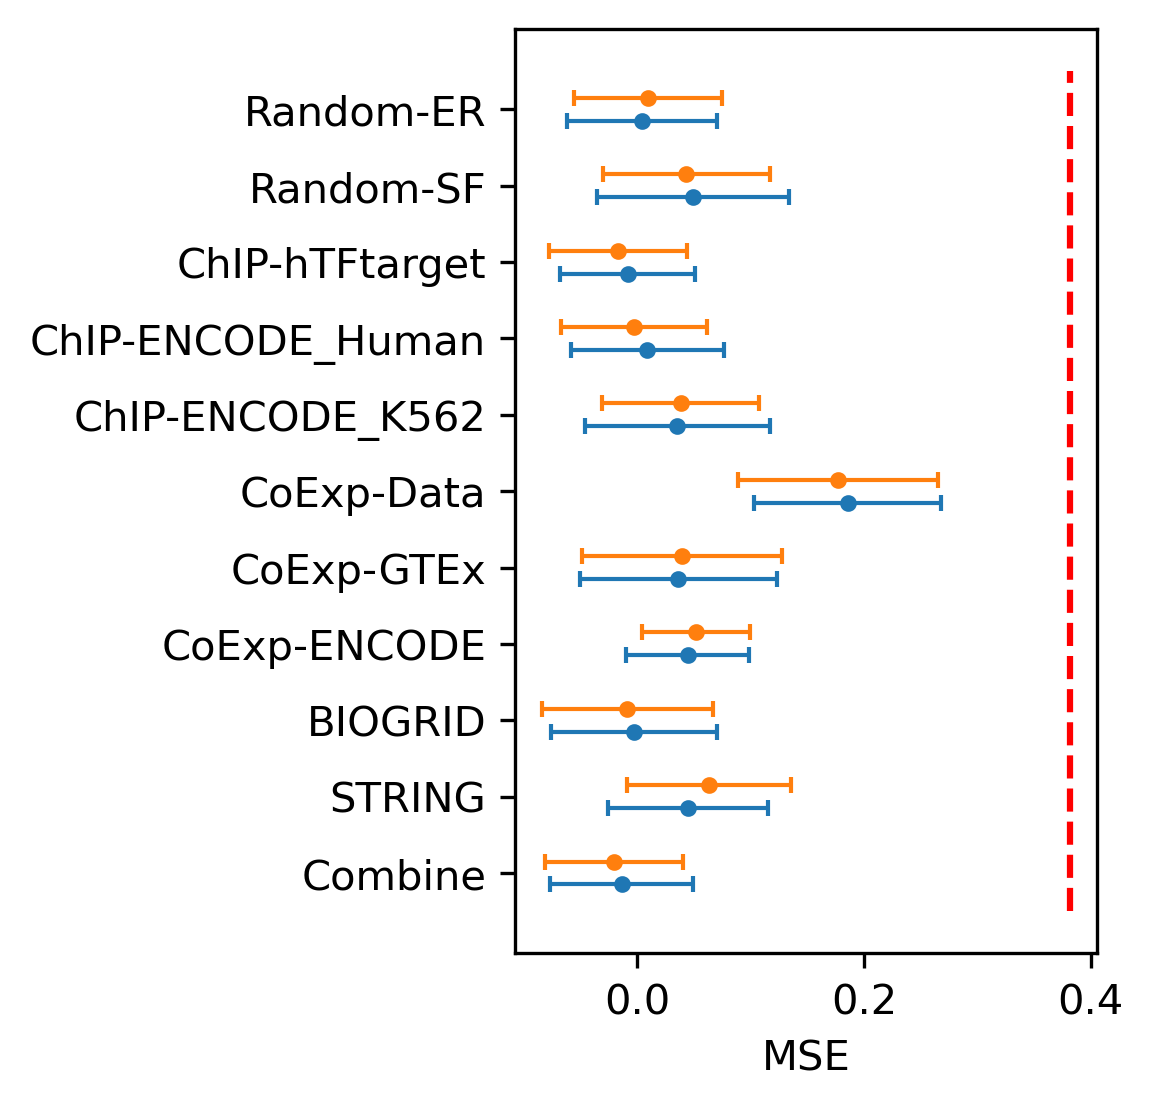

In [9]:
mean_mse_2 = []
std_mse_2 = []
mean_mse_3 = []
std_mse_3 = []
mean_mse_4 = []
std_mse_4 = []

mean_mse_2.append(p_nw_2[0,:,:].reshape(-1)[bool_nw_2[0,:,:].reshape(-1)].mean())
std_mse_2.append(p_nw_2[0,:,:].reshape(-1)[bool_nw_2[0,:,:].reshape(-1)].std())  
for ii in range(13):  
    mean_mse_3.append(p_nw_3[ii,:,:].reshape(-1)[bool_nw_3[ii,:,:].reshape(-1)].mean())
    std_mse_3.append(p_nw_3[ii,:,:].reshape(-1)[bool_nw_3[ii,:,:].reshape(-1)].std())
    mean_mse_4.append(p_nw_4[ii,:,:].reshape(-1)[bool_nw_4[ii,:,:].reshape(-1)].mean())
    std_mse_4.append(p_nw_4[ii,:,:].reshape(-1)[bool_nw_4[ii,:,:].reshape(-1)].std())

plt.figure(dpi=300, figsize=(2.5, 4))
(_, caps, _) = plt.errorbar(mean_mse_3[::-1][2:], np.arange(-0.15, len(mean_mse_3)-2-0.15, 1), xerr=std_mse_3[::-1][2:], fmt='.', elinewidth=1, capsize=2)
for cap in caps:
    cap.set_markeredgewidth(1)

(_, caps, _) = plt.errorbar(mean_mse_4[::-1][2:], np.arange(0.15, len(mean_mse_4)-2+0.15, 1), xerr=std_mse_4[::-1][2:], fmt='.', elinewidth=1, capsize=2)
for cap in caps:
    cap.set_markeredgewidth(1)


ax = plt.gca()
ax.yaxis.set_ticks(range(len(mean_mse_3)-2))
ax.yaxis.set_ticklabels(["Random-ER", "Random-SF", "ChIP-hTFtarget", "ChIP-ENCODE_Human", "ChIP-ENCODE_K562", "CoExp-Data", "CoExp-GTEx", "CoExp-ENCODE", "BIOGRID", "STRING", "Combine"][::-1])
ax.set_xlabel("MSE")

ax.vlines(mean_mse_2[-1], -0.5, len(mean_mse_3)-2.5, color='red', linestyles='dashed')
plt.savefig("./S6_p_all.pdf", dpi="figure", bbox_inches="tight")

### significance

In [10]:
from scipy.stats import ttest_ind
from scipy.stats import ttest_ind_from_stats

In [11]:
for ii in range(11):
    a1 = loss_nw_3[ii,:,:].reshape(-1)[bool_nw_3[ii,:,:].reshape(-1)]
    a2 = loss_nw_2[0,:,:].reshape(-1)[bool_nw_2[0,:,:].reshape(-1)]
    print(ttest_ind(a1, a2, equal_var=False))

Ttest_indResult(statistic=2.914084369570982, pvalue=0.004296594981813593)
Ttest_indResult(statistic=3.637690053469396, pvalue=0.00042858241079884454)
Ttest_indResult(statistic=3.058973366139972, pvalue=0.0026471935123565152)
Ttest_indResult(statistic=1.7645290844757113, pvalue=0.07982584981296859)
Ttest_indResult(statistic=2.2712279956771297, pvalue=0.02442917346228806)
Ttest_indResult(statistic=2.6754469082704535, pvalue=0.008243078924561921)
Ttest_indResult(statistic=2.9504374516914766, pvalue=0.003680599186189166)
Ttest_indResult(statistic=2.5903122351135752, pvalue=0.010400222443511398)
Ttest_indResult(statistic=3.3785812384013636, pvalue=0.0009392134252031207)
Ttest_indResult(statistic=2.478569562966322, pvalue=0.014220520395057073)
Ttest_indResult(statistic=3.1777514313118638, pvalue=0.0017782107659605943)


In [12]:
for ii in range(11):
    a1 = p_nw_3[ii,:,:].reshape(-1)[bool_nw_3[ii,:,:].reshape(-1)]
    a2 = p_nw_2[0,:,:].reshape(-1)[bool_nw_2[0,:,:].reshape(-1)]
    print(ttest_ind(a1, a2, equal_var=False))

Ttest_indResult(statistic=-29.49026083697455, pvalue=1.595204298464218e-67)
Ttest_indResult(statistic=-23.01088667440159, pvalue=9.966624904709216e-52)
Ttest_indResult(statistic=-32.7509117932577, pvalue=5.261101295185368e-73)
Ttest_indResult(statistic=-29.01873735543527, pvalue=5.94244684067718e-67)
Ttest_indResult(statistic=-25.99553081799109, pvalue=3.993382462629354e-63)
Ttest_indResult(statistic=-14.720600256379678, pvalue=7.588464654944458e-33)
Ttest_indResult(statistic=-25.05351665853915, pvalue=1.4212468838228288e-60)
Ttest_indResult(statistic=-29.247145065523558, pvalue=4.087567591348976e-64)
Ttest_indResult(statistic=-29.84027515843081, pvalue=1.5712432799819248e-70)
Ttest_indResult(statistic=-26.635034281711818, pvalue=3.210659471641614e-63)
Ttest_indResult(statistic=-32.993298233917315, pvalue=2.1447132593611627e-74)


In [16]:
for ii in range(11):
    a1 = loss_nw_4[ii,:,:].reshape(-1)[bool_nw_4[ii,:,:].reshape(-1)]
    a2 = loss_nw_2[0,:,:].reshape(-1)[bool_nw_2[0,:,:].reshape(-1)]
    print(ttest_ind(a1, a2, equal_var=False))

Ttest_indResult(statistic=3.121141677100458, pvalue=0.002171057358542249)
Ttest_indResult(statistic=3.2362785144129833, pvalue=0.0015984955287923215)
Ttest_indResult(statistic=2.435487988284295, pvalue=0.01600287981813936)
Ttest_indResult(statistic=2.6438740260706943, pvalue=0.009047438729270224)
Ttest_indResult(statistic=2.8175950439250674, pvalue=0.005432655362593812)
Ttest_indResult(statistic=2.6321316036902958, pvalue=0.009286065447261896)
Ttest_indResult(statistic=2.6347317572512465, pvalue=0.00922417992579324)
Ttest_indResult(statistic=3.170115691890731, pvalue=0.0018259036569858987)
Ttest_indResult(statistic=3.4902270068794436, pvalue=0.000642363926030963)
Ttest_indResult(statistic=3.0229617136069273, pvalue=0.002956498555826201)
Ttest_indResult(statistic=2.7752128951152115, pvalue=0.006114232798940819)


In [17]:
for ii in range(11):
    a1 = p_nw_4[ii,:,:].reshape(-1)[bool_nw_4[ii,:,:].reshape(-1)]
    a2 = p_nw_2[0,:,:].reshape(-1)[bool_nw_2[0,:,:].reshape(-1)]
    print(ttest_ind(a1, a2, equal_var=False))

Ttest_indResult(statistic=-30.232112808671747, pvalue=7.493692196733435e-70)
Ttest_indResult(statistic=-25.454197254967145, pvalue=1.535547353274283e-59)
Ttest_indResult(statistic=-33.03414194239086, pvalue=3.456831039716405e-74)
Ttest_indResult(statistic=-31.448425924904605, pvalue=4.2004152173780363e-72)
Ttest_indResult(statistic=-27.77135984094854, pvalue=1.1572651515795421e-65)
Ttest_indResult(statistic=-14.936562279562812, pvalue=1.1957198360564179e-33)
Ttest_indResult(statistic=-25.067105697559203, pvalue=1.7492699979423387e-61)
Ttest_indResult(statistic=-29.43090563759912, pvalue=5.365170217708335e-62)
Ttest_indResult(statistic=-30.16574754895327, pvalue=8.825857682622954e-72)
Ttest_indResult(statistic=-25.13259058436347, pvalue=4.5193422174695695e-60)
Ttest_indResult(statistic=-34.10643893635496, pvalue=2.364909447109969e-75)
